### 1. EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
data = pd.read_csv('Business_case_study_customer_complaints.csv')
data.head()

,Call Duration,Rate of Speech,Silence Duration,Overtalk from customer,Emotion Metrics,Volume Levels,Keyword Frequency,Agent Performance Scores,Customer Questions Asked,Response Latency,Call Transfer Rates,Follow-Up Actions,Repeat Call Rate,Complaint
0,268.066810,136.864070,9.956744,5,1,71.409710,3,8.011061,4,30.262561,3,5,1,0
1,251.006169,116.234164,19.744934,4,4,62.591733,3,5.875114,3,9.834923,3,6,3,0
2,208.562376,142.460695,15.830804,4,2,70.741125,5,5.847181,4,22.167052,4,8,3,0
3,204.529695,126.641340,21.100091,4,1,65.349376,3,9.341326,4,31.152030,4,7,3,0
4,269.107030,151.548649,1.594576,6,8,90.561863,9,5.587510,12,66.579802,10,12,10,1


In [8]:
# Display dataset information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call Duration             50000 non-null  float64
 1   Rate of Speech            50000 non-null  float64
 2   Silence Duration          50000 non-null  float64
 3   Overtalk from customer    50000 non-null  int64  
 4   Emotion Metrics           50000 non-null  int64  
 5   Volume Levels             50000 non-null  float64
 6   Keyword Frequency         50000 non-null  int64  
 7   Agent Performance Scores  50000 non-null  float64
 8   Customer Questions Asked  50000 non-null  int64  
 9   Response Latency          50000 non-null  float64
 10  Call Transfer Rates       50000 non-null  int64  
 11  Follow-Up Actions         50000 non-null  int64  
 12  Repeat Call Rate          50000 non-null  int64  
 13  Complaint                 50000 non-null  int64

In [10]:
# Basic statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Call Duration  Rate of Speech  Silence Duration  \
count   50000.000000    50000.000000      50000.000000   
mean      330.148355      136.081493         16.533752   
std       104.095003       23.481580          6.443387   
min         4.930777       42.013379          0.018075   
25%       258.926432      120.097521         12.200394   
50%       321.082776      135.036470         16.030730   
75%       391.244349      150.985664         20.306109   
max       917.390364      241.296995         54.319142   

       Overtalk from customer  Emotion Metrics  Volume Levels  \
count            50000.000000     50000.000000   50000.000000   
mean                 3.610920         4.147020      74.638628   
std                  2.099692         2.795296      10.291189   
min                  0.000000         1.000000      60.000000   
25%                  2.000000         2.000000      66.685841   
50%                  3.000000         3.000000      73.319934 

In [12]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Call Duration               0
Rate of Speech              0
Silence Duration            0
Overtalk from customer      0
Emotion Metrics             0
Volume Levels               0
Keyword Frequency           0
Agent Performance Scores    0
Customer Questions Asked    0
Response Latency            0
Call Transfer Rates         0
Follow-Up Actions           0
Repeat Call Rate            0
Complaint                   0
dtype: int64


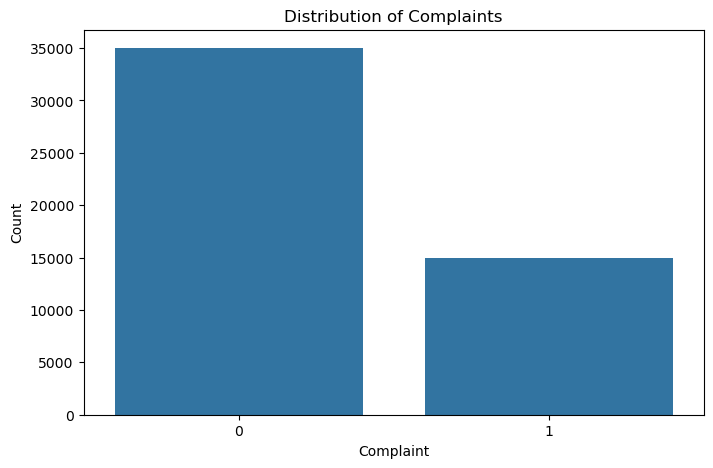

In [14]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Complaint', data=data)
plt.title("Distribution of Complaints")
plt.xlabel("Complaint")
plt.ylabel("Count")
plt.show()

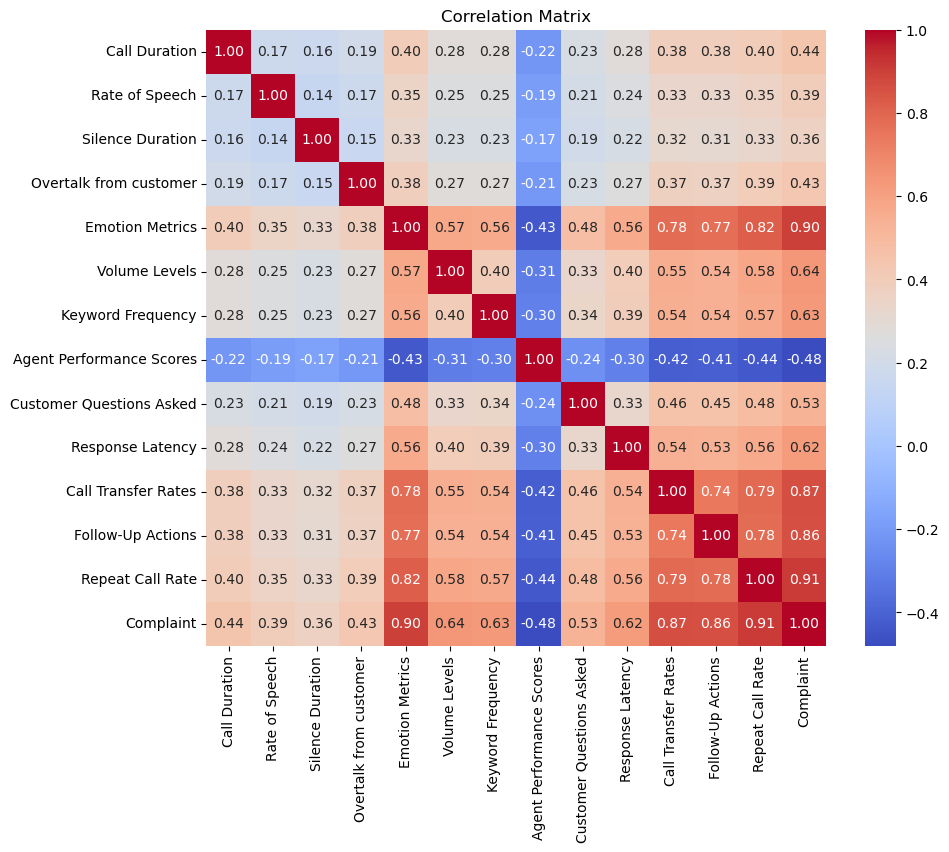

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

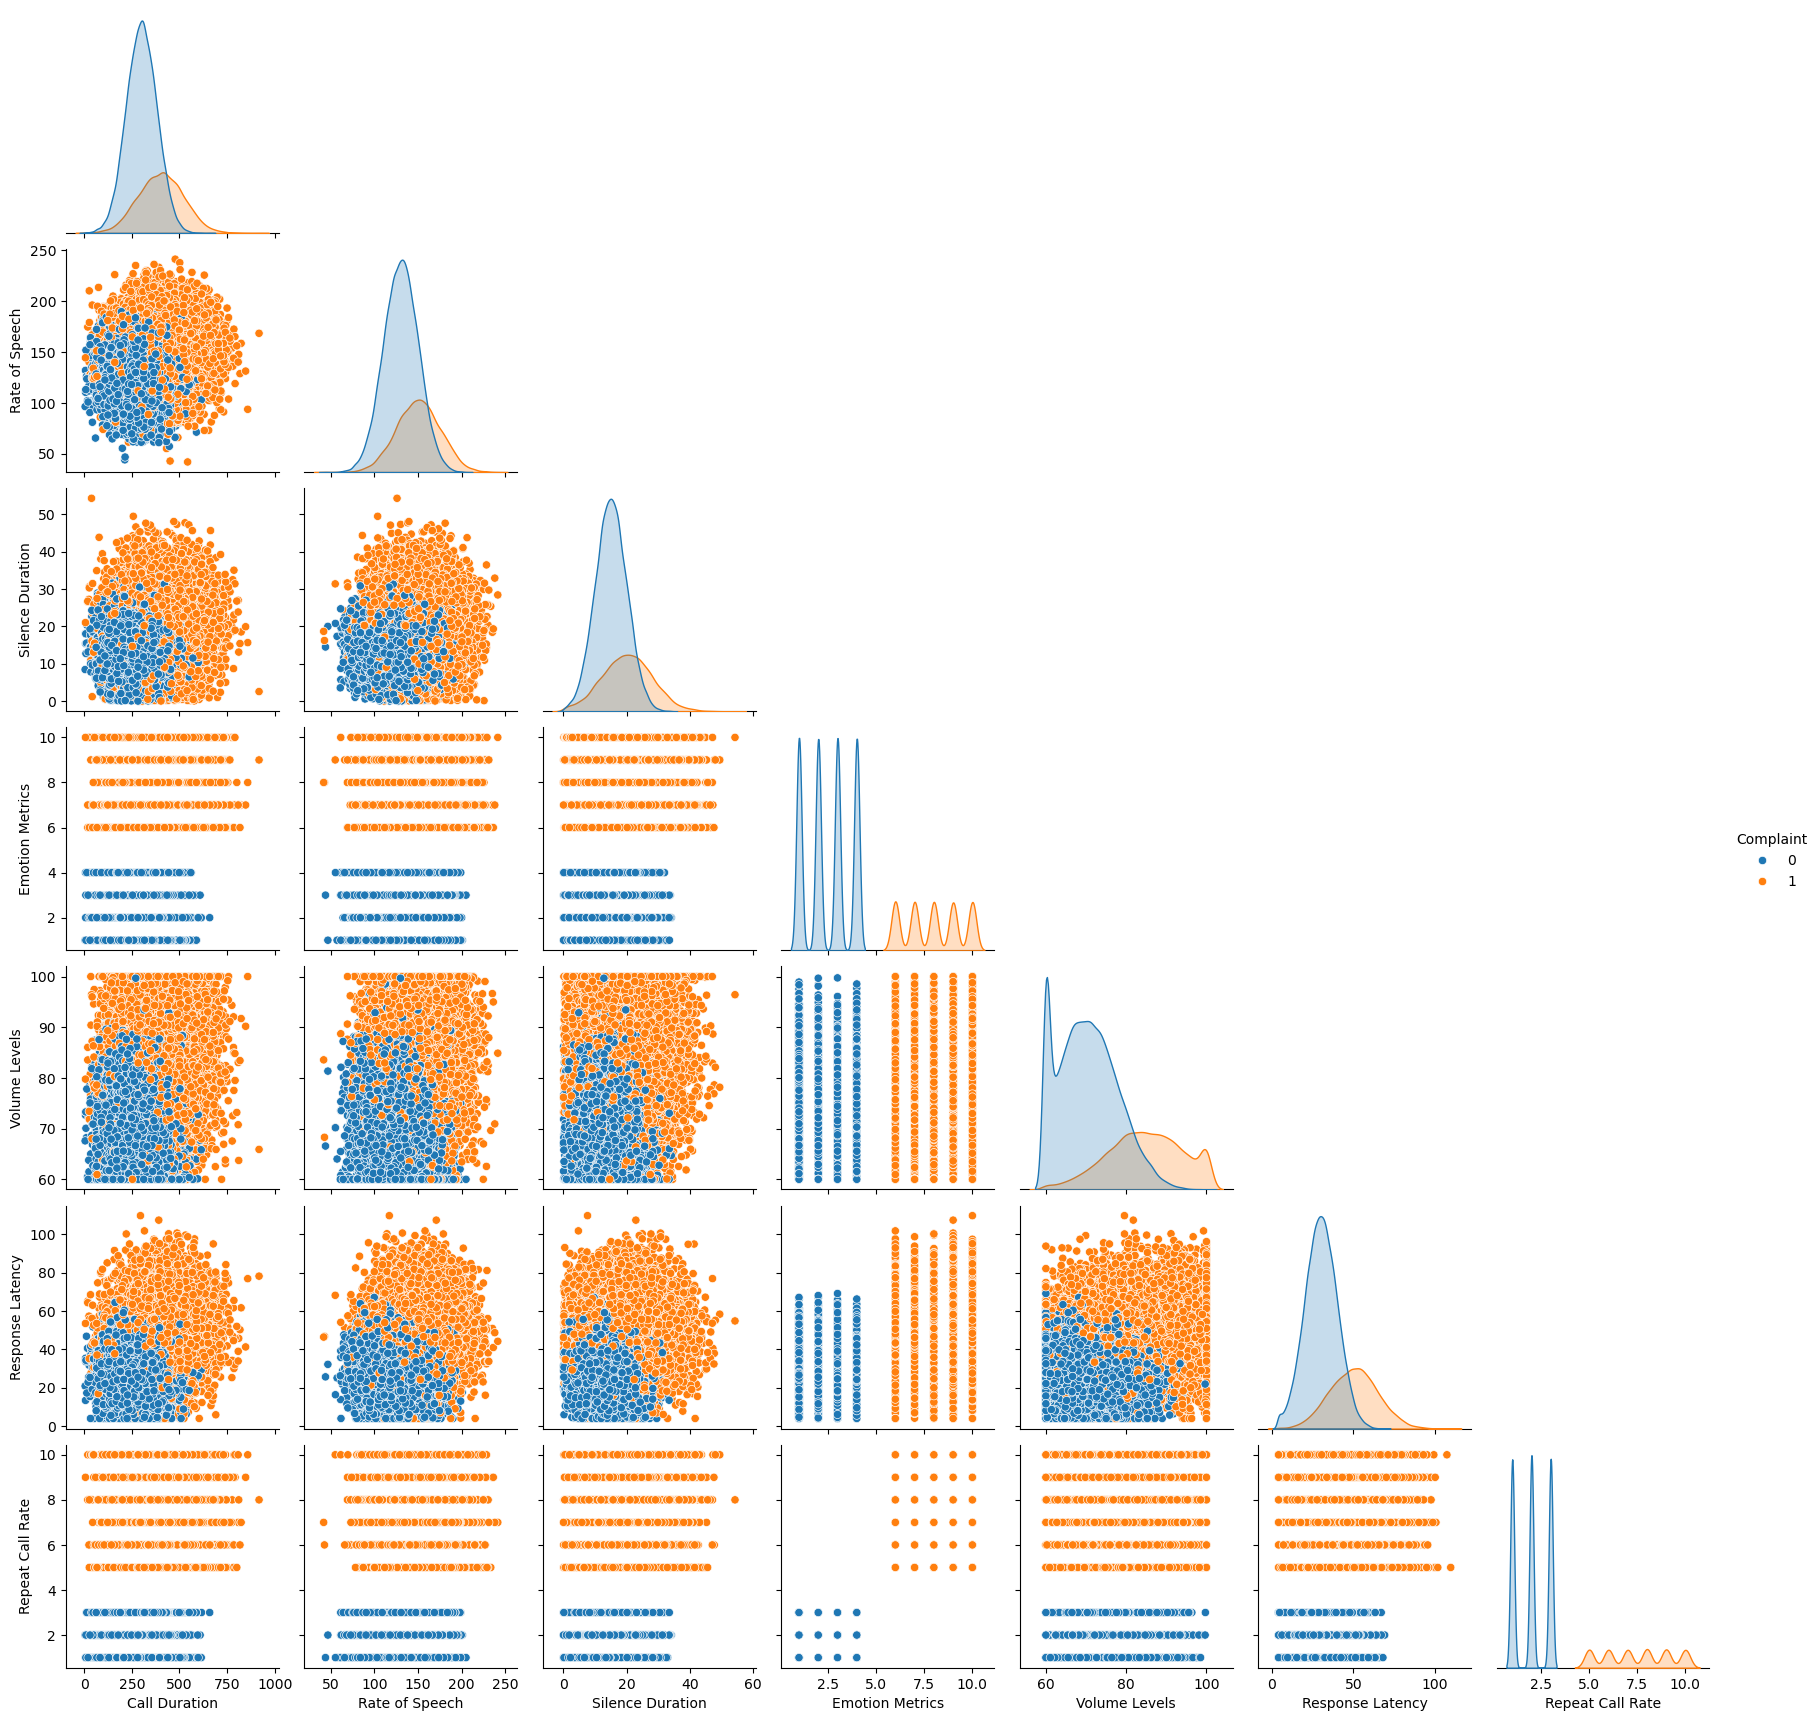

In [18]:
# Pairplot for key features
important_features = ['Call Duration', 'Rate of Speech', 'Silence Duration', 'Emotion Metrics', 
                      'Volume Levels', 'Response Latency', 'Repeat Call Rate']
sns.pairplot(data[important_features + ['Complaint']], hue='Complaint', diag_kind='kde', corner=True)
plt.show()

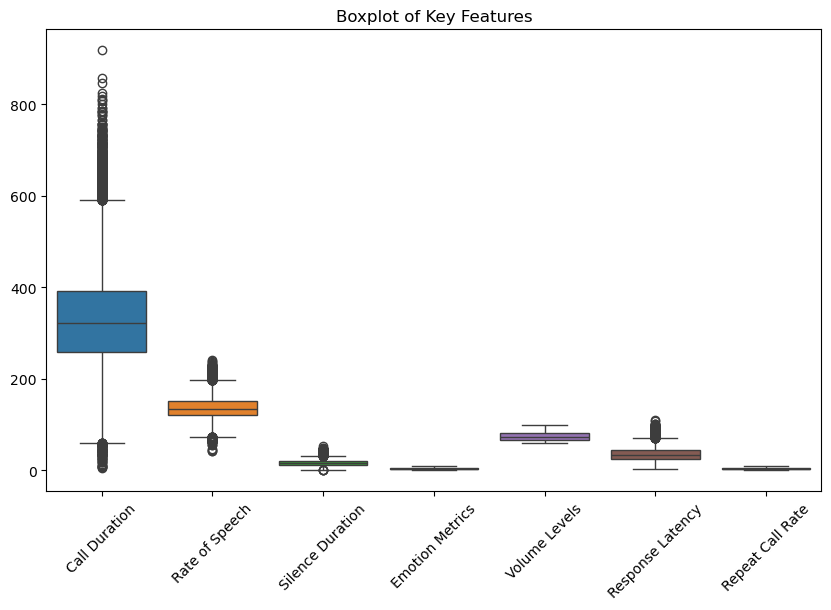

In [20]:
# Boxplot for identifying outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[important_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Key Features")
plt.show()

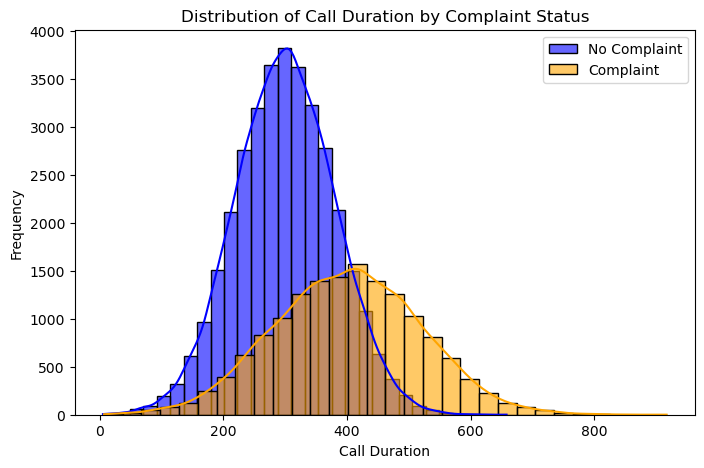

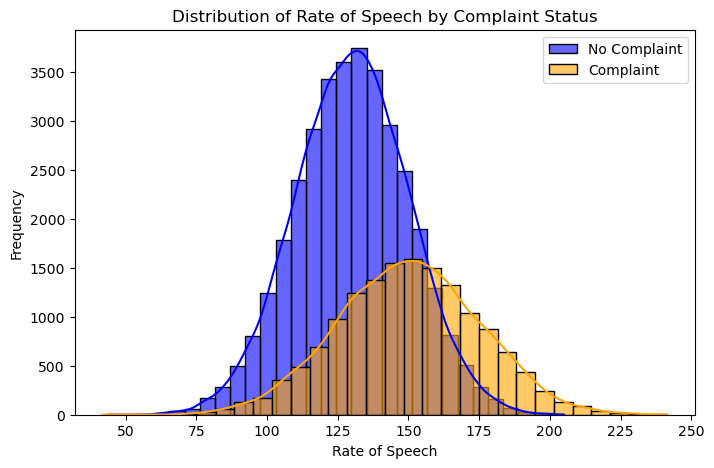

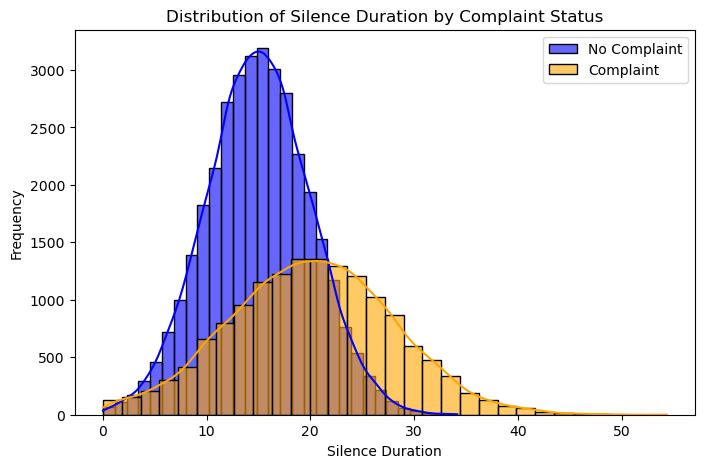

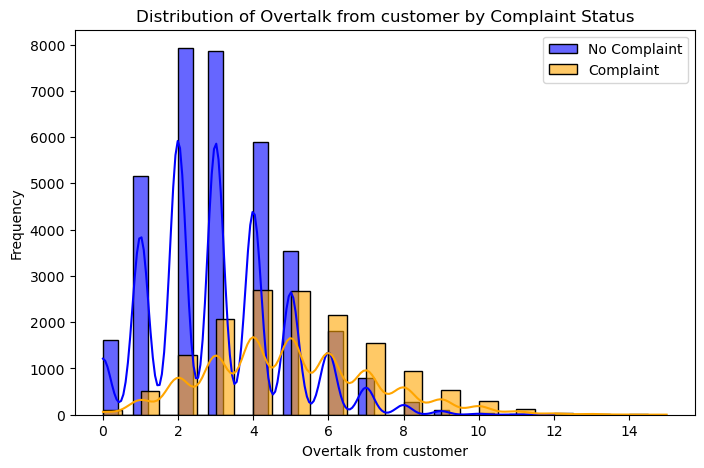

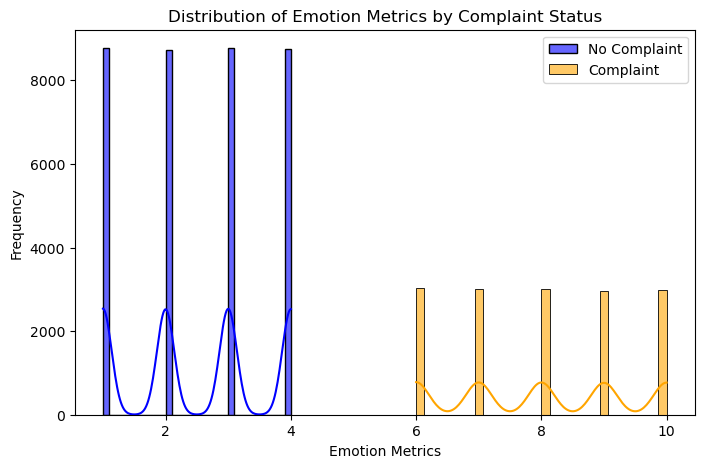

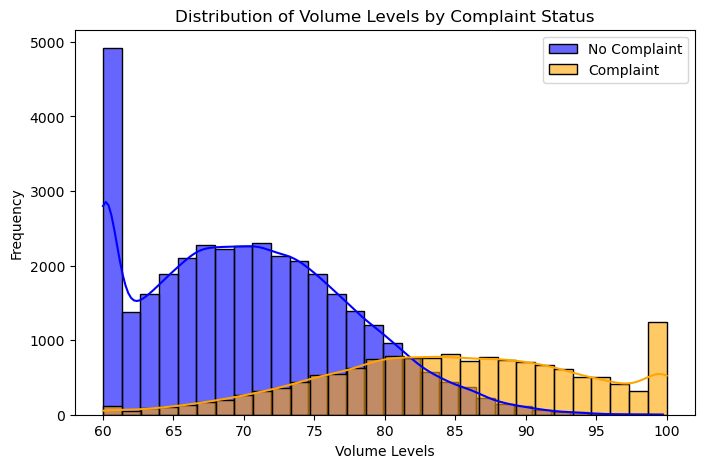

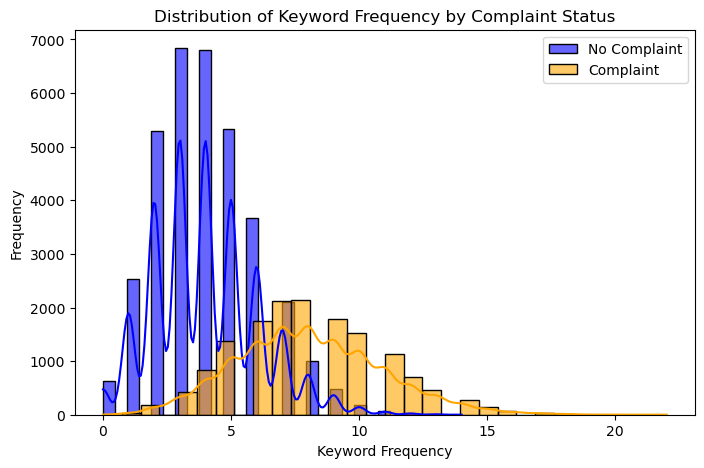

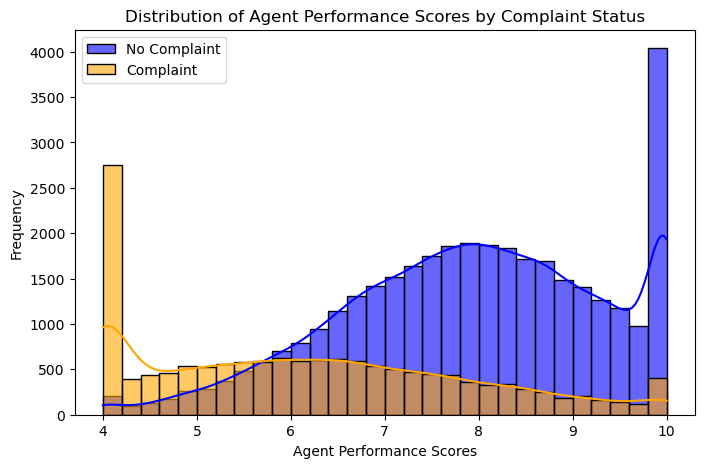

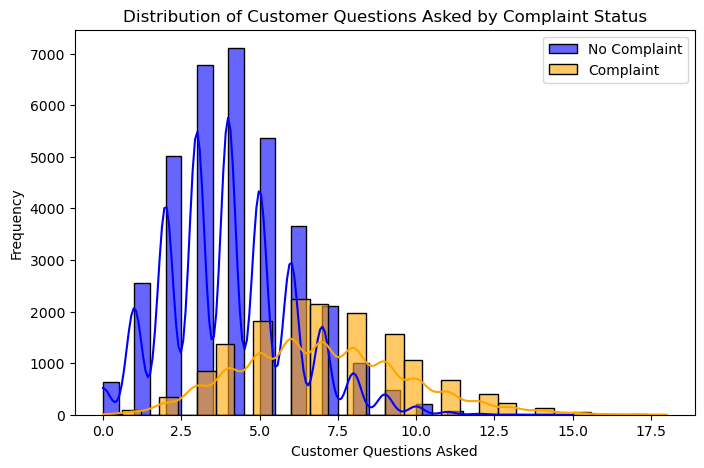

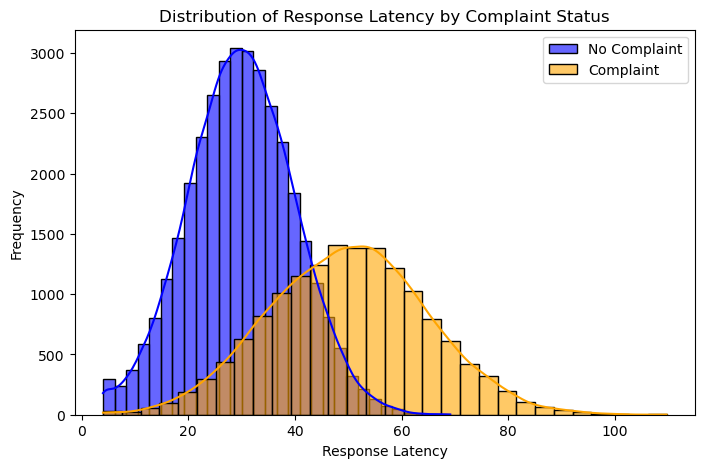

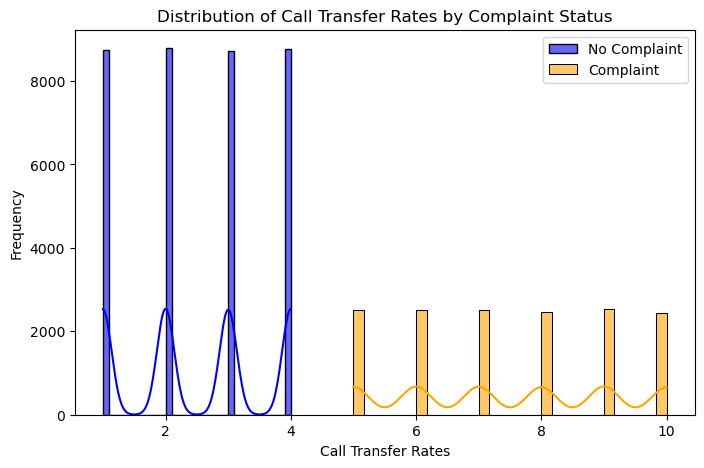

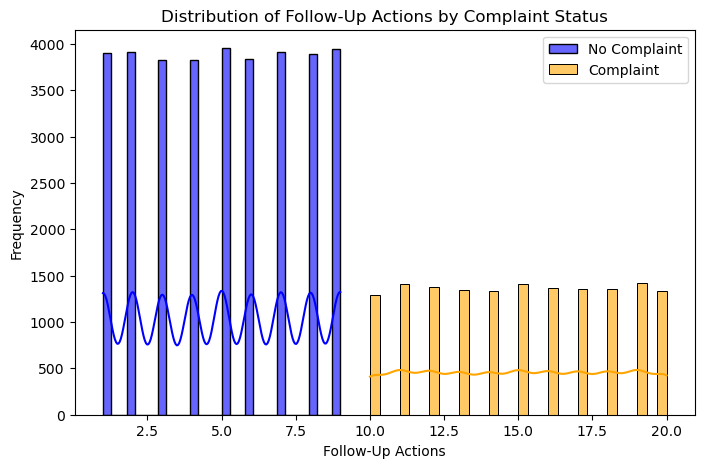

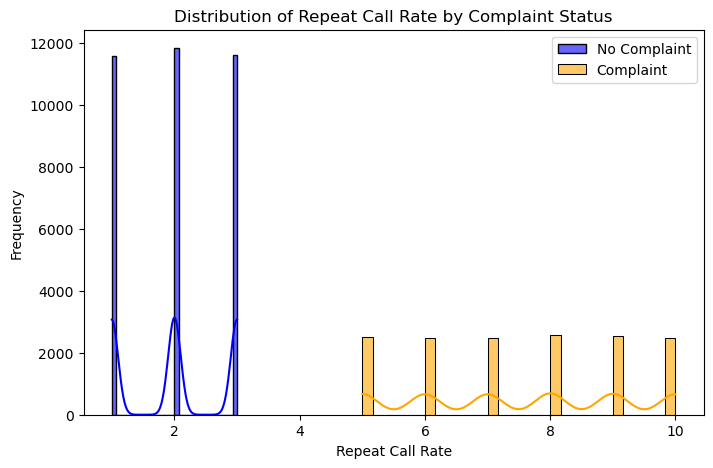

In [24]:
# Feature-wise analysis
for column in data.columns:
    if column != "Complaint":
        plt.figure(figsize=(8, 5))
        sns.histplot(data[data['Complaint'] == 0][column], kde=True, bins=30, color='blue', label='No Complaint', alpha=0.6)
        sns.histplot(data[data['Complaint'] == 1][column], kde=True, bins=30, color='orange', label='Complaint', alpha=0.6)
        plt.title(f"Distribution of {column} by Complaint Status")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif


In [30]:
# Feature Engineering
data['Emotion_Volume_Interaction'] = data['Emotion Metrics'] * data['Volume Levels']

In [32]:
# Splitting Features and Target
X = data.drop(columns=['Complaint'])
y = data['Complaint']

In [34]:
# Normalize Continuous Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Feature Selection using SelectKBest (ANOVA F-test)
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support(indices=True)]
print(f"Selected Features: {list(selected_features)}")

Selected Features: ['Emotion Metrics', 'Volume Levels', 'Keyword Frequency', 'Agent Performance Scores', 'Customer Questions Asked', 'Response Latency', 'Call Transfer Rates', 'Follow-Up Actions', 'Repeat Call Rate', 'Emotion_Volume_Interaction']


In [81]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [84]:
# Update models with class weights where applicable
models_weighted = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [87]:
# Cross-Validation Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [89]:
# Train and evaluate models
results_weighted = []
confusion_matrices = {}
cv_results = {}

In [91]:
for name, model in models_weighted.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=cv, scoring='f1')
    cv_results[name] = cv_scores

    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predictions and metrics for training data
    y_train_pred = model.predict(X_train_balanced)
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_f1 = f1_score(y_train_balanced, y_train_pred)
    
    # Predictions and metrics for testing data
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store metrics
    results_weighted.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Train F1 Score": train_f1,
        "Test Accuracy": test_accuracy,
        "Test F1 Score": test_f1,
        "CV Mean F1": cv_scores.mean(),
        "CV Std F1": cv_scores.std()
    })
    
    # Confusion Matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_test_pred)

C:\Users\rakes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rakes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rakes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rakes\anaconda3\Lib\site-packages\

In [92]:
# Visualization of Results
results_weighted_df = pd.DataFrame(results_weighted)
print(results_weighted_df)

# Print Best Model Based on Test Accuracy and F1 Score
best_test_accuracy_model = results_weighted_df.loc[results_weighted_df['Test Accuracy'].idxmax()]['Model']
best_test_f1_model = results_weighted_df.loc[results_weighted_df['Test F1 Score'].idxmax()]['Model']
print(f"Best Model Based on Test Accuracy: {best_test_accuracy_model}")
print(f"Best Model Based on Test F1 Score: {best_test_f1_model}")


                 Model  Train Accuracy  Train F1 Score  Test Accuracy  \
0  Logistic Regression             1.0             1.0            1.0   
1                  SVM             1.0             1.0            1.0   
2        Random Forest             1.0             1.0            1.0   
3    Gradient Boosting             1.0             1.0            1.0   
4              XGBoost             1.0             1.0            1.0   

   Test F1 Score  CV Mean F1  CV Std F1  
0            1.0         1.0        0.0  
1            1.0         1.0        0.0  
2            1.0         1.0        0.0  
3            1.0         1.0        0.0  
4            1.0         1.0        0.0  
Best Model Based on Test Accuracy: Logistic Regression
Best Model Based on Test F1 Score: Logistic Regression


In [93]:
# Display Cross-Validation Results
for name, scores in cv_results.items():
    print(f"{name} Cross-Validation F1 Scores: {scores}")
    print(f"Mean F1: {scores.mean():.4f}, Std Dev F1: {scores.std():.4f}")

Logistic Regression Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000, Std Dev F1: 0.0000
SVM Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000, Std Dev F1: 0.0000
Random Forest Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000, Std Dev F1: 0.0000
Gradient Boosting Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000, Std Dev F1: 0.0000
XGBoost Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000, Std Dev F1: 0.0000


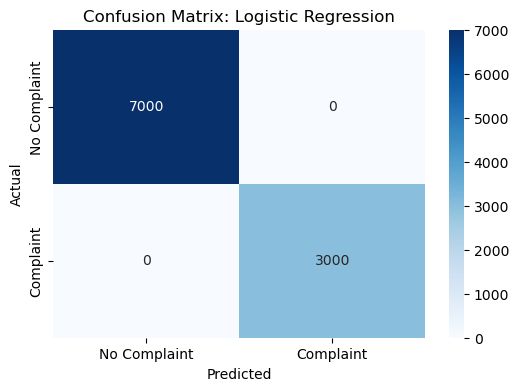

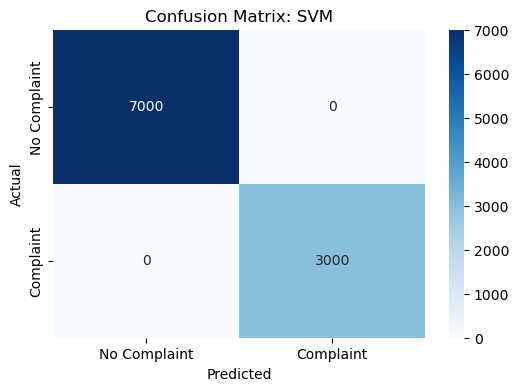

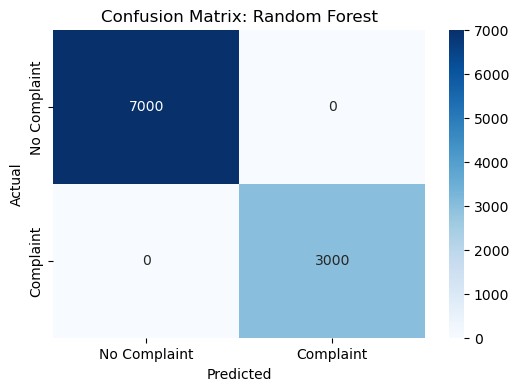

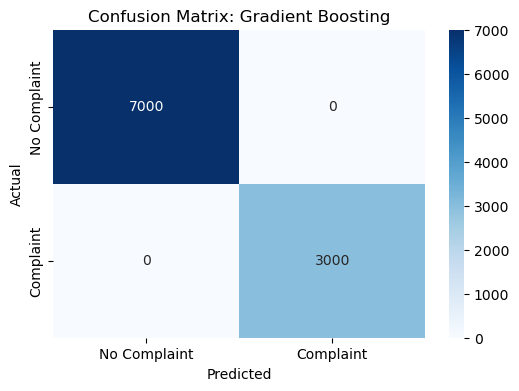

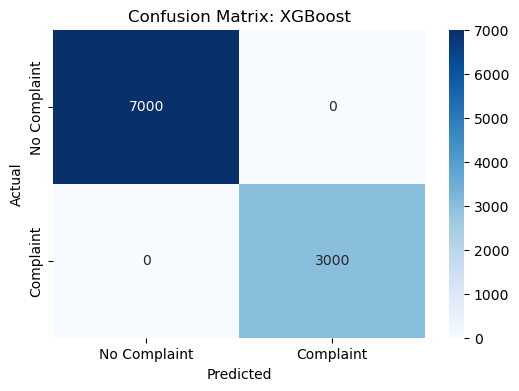

In [94]:
# Display Confusion Matrices
for name, matrix in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Complaint', 'Complaint'], yticklabels=['No Complaint', 'Complaint'])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

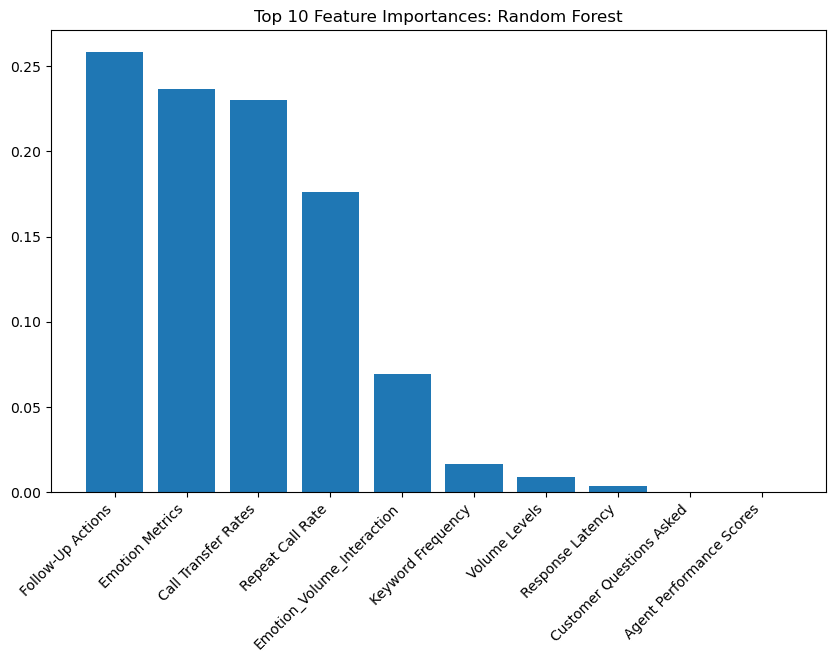

Top Features by Importance:
Follow-Up Actions: 0.2582
Emotion Metrics: 0.2368
Call Transfer Rates: 0.2302
Repeat Call Rate: 0.1762
Emotion_Volume_Interaction: 0.0694
Keyword Frequency: 0.0163
Volume Levels: 0.0091
Response Latency: 0.0037
Customer Questions Asked: 0.0000
Agent Performance Scores: 0.0000


In [101]:
# Visualizing Feature Importance for Random Forest
random_forest = models_weighted["Random Forest"]
if hasattr(random_forest, "feature_importances_"):
    plt.figure(figsize=(10, 6))
    importance = random_forest.feature_importances_
    indices = np.argsort(importance)[::-1]
    top_features = selected_features[indices][:10]
    top_importance = importance[indices][:10]
    plt.bar(range(len(top_features)), top_importance, align="center")
    plt.xticks(range(len(top_features)), top_features, rotation=45, ha="right")
    plt.title("Top 10 Feature Importances: Random Forest")
    plt.show()
    print("Top Features by Importance:")
    for feature, score in zip(top_features, top_importance):
        print(f"{feature}: {score:.4f}")
